<a href="https://colab.research.google.com/github/anuragpandey8998/project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of data:
        u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292542     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q         pm  stator_yoke    ambient    torque  profile_id  
0  0.004419  0.000328  24.554214    18.316547  19.850691  0.187101        17.0  
1  0.000606 -0.000785  24.538078    18.314955  19.850672  0.245417        17.0  
2  0.001290  0.000386  24.544693    18.326307  19.850657  0.176615        17.0  
3  0.000026  0.002046  24.554018    18.330833  19.850647  0.238303        17.0  
4 -0.064317  0.037184  24.565397    18.326662  19.850639  0.208197        17.0  

 Data Info:
<cla

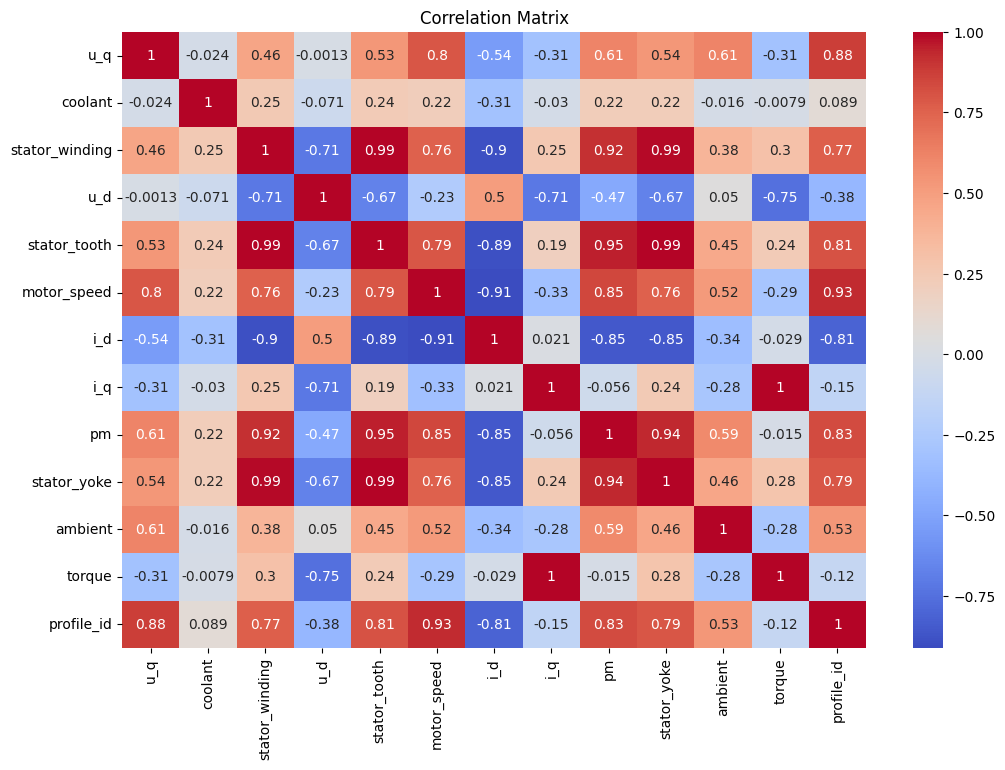


Evaluation Matrices:
R^2 Score: 0.9833406524373924
Mean Square Error(MSE): 2.5569172457280347


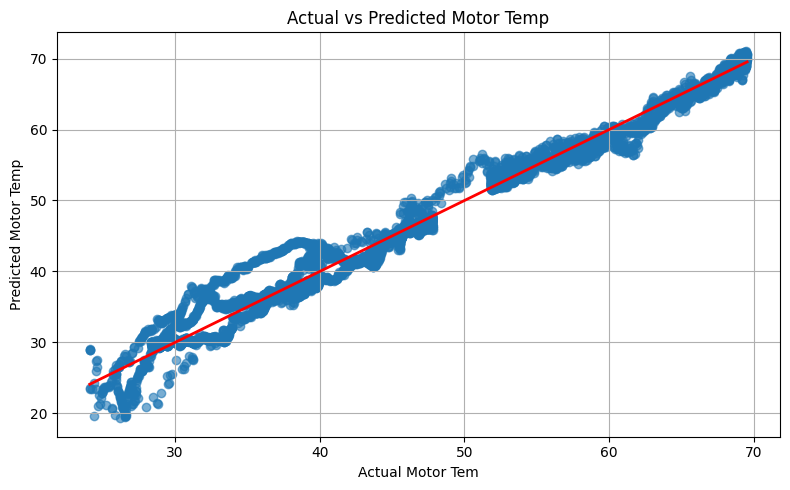


Model Coefficients:
           Feature  Coefficient
5      motor_speed   103.013189
6              i_d    65.875861
0              u_q   -36.172756
2   stator_winding   -22.909388
4     stator_tooth    22.661401
7              i_q    21.197013
8      stator_yoke     9.311150
3              u_d     7.282085
10          torque     3.606486
11      profile_id    -1.690865
9          ambient     0.093570
1          coolant    -0.029444


['scaler_motor_temp.pkl']

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

data=pd.read_csv('measures_v2.csv')

print("First 5 rows of data:")
print(data.head())
print("\n Data Info:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe())

print("\nColumn Names:")
print(data.columns)
target_col="pm" # Corrected target column name
if target_col not in data.columns:
    raise ValueError(f"Target column '{target_col}' not found. Please check your dataset column.")
data=data.dropna()

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True)
,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

x=data.drop(target_col,axis=1)
y=data[target_col]


scaler= StandardScaler()
X_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model =LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("\nEvaluation Matrices:")
print("R^2 Score:",r2_score(y_test,y_pred))
print("Mean Square Error(MSE):",
      mean_squared_error(y_test,y_pred))
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.xlabel("Actual Motor Tem")
plt.ylabel("Predicted Motor Temp")
plt.title("Actual vs Predicted Motor Temp")
plt.plot([y_test.min(),y_test.max()],
         [y_test.min(),y_test.max()],color='red',
         lw=2)
plt.grid(True)
plt.tight_layout()
plt.show()



coef_df=pd.DataFrame({
    'Feature':x.columns,
    'Coefficient':model.coef_
}).sort_values(by='Coefficient',key=abs,
ascending=False)

print("\nModel Coefficients:")
print(coef_df)

joblib.dump(model,
            'linear_model_motor_temp.pkl')
joblib.dump(scaler,
'scaler_motor_temp.pkl')